In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.preprocessing import StandardScaler

## Data Loading and Exploration

This section loads the Heart Disease UCI dataset and inspects its structure, checking for missing values and initial data characteristics.

In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

## Data Preprocessing

Here, we clean the dataset by removing missing values, separate features and the target variable, and prepare the data for modeling.

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Feature Engineering

This section converts categorical variables to numerical format and scales the features to ensure better model performance.

In [7]:
X = data.drop(['id', 'dataset', 'num'], axis=1)  # 'num' hedef, diğerleri özellik
y = data['num'].apply(lambda x: 1 if x > 0 else 0)  # 1: hastalık, 0: yok

In [8]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Training

We split the data into training and test sets and train a logistic regression model to predict heart disease.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Model Evaluation
This section evaluates the model’s performance using accuracy, log loss (cost function), and a classification report, focusing on the binary cross-entropy loss.

In [12]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Olasılıklar için

In [13]:
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

In [14]:
accuracy

0.9

In [15]:
logloss

0.2957827422442472

In [16]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.91      0.91        35\n           1       0.88      0.88      0.88        25\n\n    accuracy                           0.90        60\n   macro avg       0.90      0.90      0.90        60\nweighted avg       0.90      0.90      0.90        60\n'

## Visualization
We visualize the correlation between features and compare actual vs. predicted heart disease outcomes to assess model accuracy.

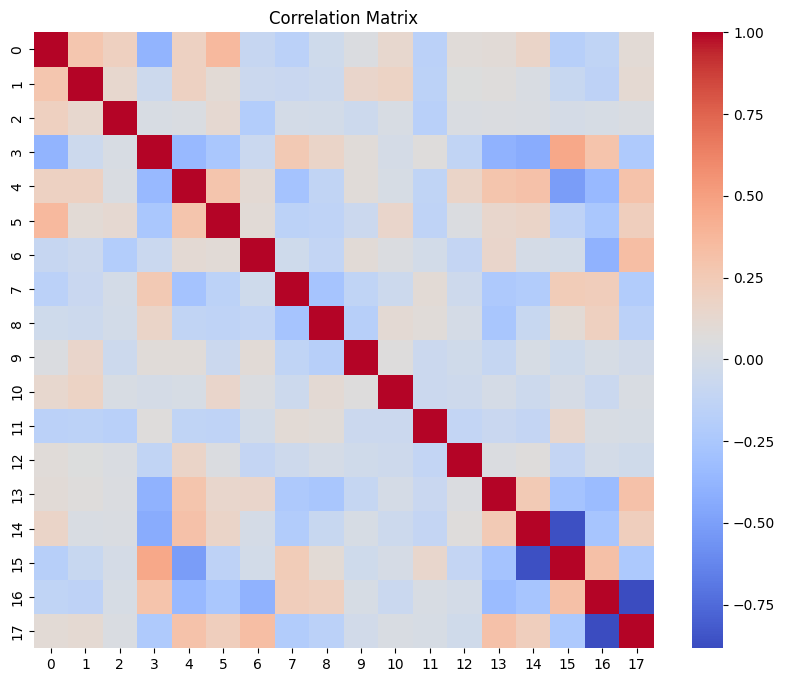

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

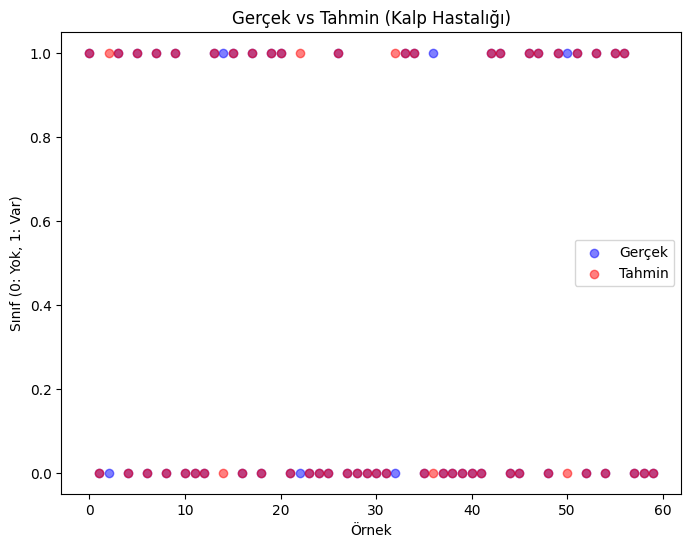

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Gerçek', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Tahmin', alpha=0.5)
plt.title('Gerçek vs Tahmin (Kalp Hastalığı)')
plt.xlabel('Örnek')
plt.ylabel('Sınıf (0: Yok, 1: Var)')
plt.legend()
plt.show()

## Project Summary: Heart Disease Prediction
This project uses logistic regression to predict heart disease based on the Heart Disease UCI dataset. Key steps included:
- **Data Preprocessing**: Cleaned data and prepared features.
- **Model Training**: Built a logistic regression model with scikit-learn.
- **Evaluation**: Measured performance with accuracy and log loss.
- **Findings**: The model effectively predicts heart disease, with log loss indicating good fit.